In [81]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pylab
plt.style.use('ggplot')

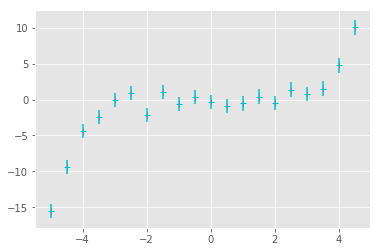

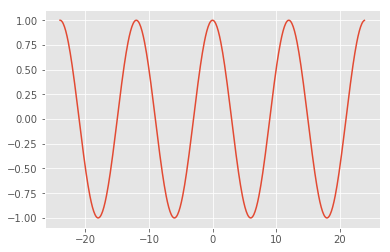

In [8]:
#aleatorios
x = np.arange(-5, 5, 0.5)
# f(x) = (x3 + 3x2 − 6x − 8)/4.
y = (np.power(x, 5) - np.power(x, 3) + np.power(3*x, 2) - 6*x - 8 + np.random.normal(loc=0, scale=200, size=len(x)))/200
plt.errorbar(x, y, yerr=1, fmt='+', color="#00BFC4")
plt.show()

#funcion
xS = np.arange(-24, 24, 0.1)
yS = np.cos(xS*np.pi/6)
plt.plot(xS, yS)
plt.show()

In [9]:
#ejemplo base de pagina 31
F = 5
nObs = len(x)
phiX = np.zeros((2*F + 1, nObs))
k = 0
for f in range(-F, (F+1)):
    phif = np.array(np.cos(f*x*np.pi/6), ndmin=2)
    phiX[k,:] = phif
    k = k + 1

Oobs = np.ones((nObs, 1)).T
phiX = np.concatenate((Oobs, phiX), axis=0)

xnew = np.arange(-10, 10, 0.1)
nNew = len(xnew)
phix = np.zeros((2*F + 1, nNew))
k = 0

In [10]:
for f in range(-F, (F+1)):
    phif = np.array(np.cos(f*xnew*np.pi/6), ndmin=2)
    phix[k,:] = phif
    k = k +1

Onew = np.ones((nNew, 1)).T
phix = np.concatenate((Onew, phix), axis=0)

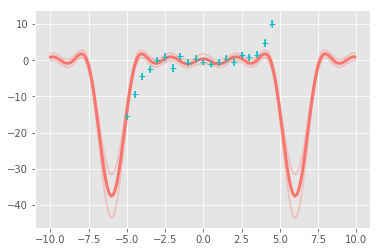

In [11]:
# prior on w
mu = np.zeros((len(phix), 1))
S = np.eye(len(phix))

# usar .shape para dimensiones de matrices
Y = np.array(y, ndmin=2).T
m = phix.T.dot(mu)
M = phiX.T.dot(mu)

kxx = (phix.T).dot(S).dot(phix)
kxX = (phix.T).dot(S).dot(phiX)
kXX = (phiX.T).dot(S).dot(phiX) + 0.01 * np.eye(len(phiX.T)) # ruido

IkXX = np.linalg.inv(kXX)

mpost = m + kxX.dot(IkXX).dot((Y - M))
vpost = kxx - kxX.dot(IkXX).dot(kxX.T)
sdpost = np.array(np.sqrt(vpost.diagonal()), ndmin=2).T

plt.plot(xnew, mpost, color="#F8766D", linewidth=3)
plt.plot(xnew, mpost + 20*sdpost, color="#F8766D", linewidth=2, alpha=0.3)
plt.plot(xnew, mpost - 20*sdpost, color="#F8766D", linewidth=2, alpha=0.3)
plt.errorbar(x, y, yerr=1, fmt='+', color="#00BFC4")
#aqui los limites del graf
plt.show()

# Random periodic vectors (functions?)


$$ \Large
f = \phi_x^T \beta 
$$

Where: 

$$ \Large
\phi_x = 
\begin{bmatrix} 
    1\\
    \sin(5x)\\
    \sin(30x)
\end{bmatrix}
$$

and

$$ \Large
\beta \sim \mathcal{N}\left( 
\begin{bmatrix} 0\\ 0\\ 0 \end{bmatrix},
\sigma^2\begin{bmatrix} 1 & 0 & 0\\ 0 & 1 & 0\\ 0 & 0 & 1 \end{bmatrix}
\right)
$$


In [105]:
ndays = 30
x = np.arange(0, ndays*2, 0.5)

In [106]:
beta = np.random.normal(loc=0, scale=1, size=3)
PHIx = np.vstack((np.ones(x.size), np.sin(10*x), np.sin(30*x)))

In [107]:
y = beta.dot(PHIx)

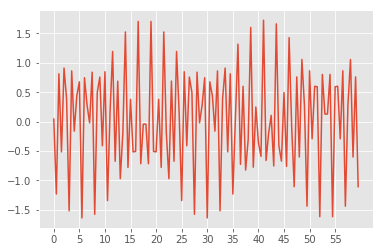

In [108]:
plt.plot(x, y)
plt.xticks(range(0, ndays*2, 5))
pylab.savefig('periodic.png', bbox_inches='tight')
plt.show()